In [55]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# import required libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Read data
file = 'drive/My Drive/Colab Notebooks/databases/medium/Transactions.csv'
df = pd.read_csv(file)

print(df.head())

   Unnamed: 0.1  Unnamed: 0  TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  \
0             0           0               0  2023-01-01 00:00:31          596   
1             1           1               1  2023-01-01 00:02:10         4961   
2             2           2               2  2023-01-01 00:07:56            2   
3             3           3               3  2023-01-01 00:09:29         4128   
4             4           4               4  2023-01-01 00:10:34          927   

   TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  \
0         3156     533.07               31             0   
1         3412     808.56              130             0   
2         1365    1442.94              476             0   
3         8737     620.65              569             0   
4         9906     490.66              634             0   

                 TX_FRAUD_SCENARIO  
0           Legitimate Transaction  
1           Legitimate Transaction  
2  Fraudulent Transaction Internet  
3   

In [58]:
# Data exploration

# Dimensions
dimensions = df.shape
display(dimensions)

# Counting axis
print("\nOur dataframe has %d rows and %d columns.\n" % (dimensions[0], dimensions[1]))

# Describing the dataframe
described = df.describe()
display(described)

print('\n')
# Info from the df
info = df.info()
display(info)

print('\n')
# Analyse null data
print(df.isnull().sum())

(1754155, 10)


Our dataframe has 1754155 rows and 10 columns.



,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01
std,5.063811e+05,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00
25%,4.385385e+05,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01
50%,8.770770e+05,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01
75%,1.315616e+06,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02
max,1.754154e+06,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   Unnamed: 0         int64  
 2   TRANSACTION_ID     int64  
 3   TX_DATETIME        object 
 4   CUSTOMER_ID        int64  
 5   TERMINAL_ID        int64  
 6   TX_AMOUNT          float64
 7   TX_TIME_SECONDS    int64  
 8   TX_TIME_DAYS       int64  
 9   TX_FRAUD_SCENARIO  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 133.8+ MB


None



Unnamed: 0.1         0
Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD_SCENARIO    0
dtype: int64


In [ ]:
# Example

In [59]:
def plot_fraud_scenario_counts(data_frame):
    """
    Plots the counts of transactions for different fraud scenarios.

    :param data_frame: The DataFrame containing the data.
    """

    # Grouping data by 'Fraud_Scenario' and counting occurrences
    fraud_counts = data_frame['TX_FRAUD_SCENARIO'].value_counts().reset_index()
    fraud_counts.columns = ['Fraud Scenario', 'Transaction Count']

    # Grouping columns by alphabetical order
    fraud_counts = fraud_counts.sort_values(by='Fraud Scenario')

    # Creating a bar plot
    fig = px.bar(fraud_counts, x='Fraud Scenario', y='Transaction Count', color='Fraud Scenario',)

    # Customizing plot labels
    fig.update_layout(
        xaxis_title='Fraud Scenario',
        yaxis_title='Number of Transactions'
    )

    # Update plot width
    fig.update_layout(width=1200)

    # Show the plot
    fig.show()

# Call the function to plot fraud scenario counts
plot_fraud_scenario_counts(df)

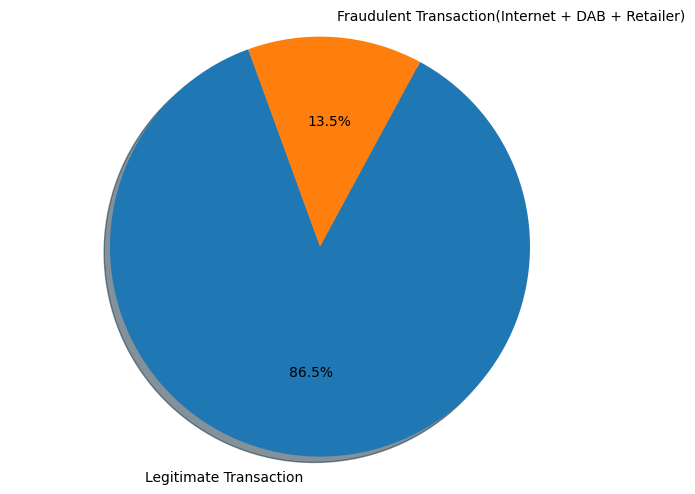

In [ ]:
# Example

In [60]:
# Creating new df
df_new = df

# Define a method to split transactions as fraudulent or legitimate
def classify_fraud(row):
    if "Fraudulent" in row['TX_FRAUD_SCENARIO']:
        return "Fraudulent Transaction(Internet + DAB + Retailer)"
    else:
        return "Legitimate Transaction"

# Creating a new col named "FRAUDULENT" with fraud decision
df_new['TX_FRAUDULENT_CATEGORY'] = df.apply(classify_fraud, axis=1)

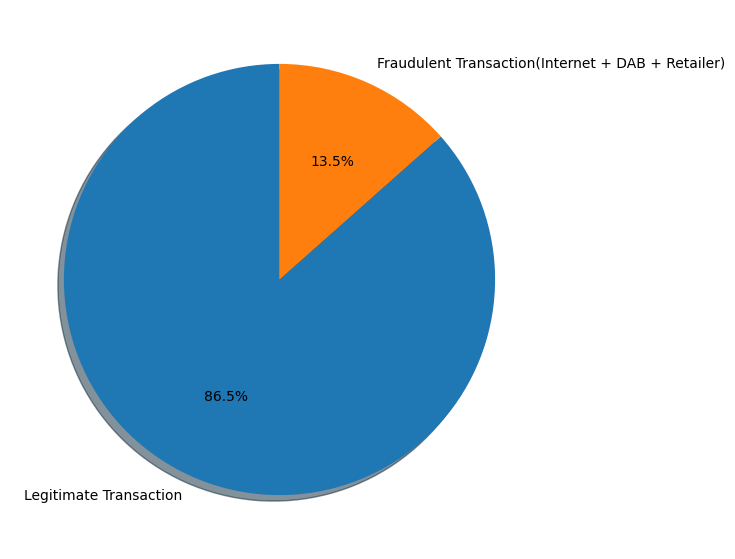

In [ ]:
def plot_data_imbalance(data_frame, target_column):
    """
    Display a pie chart to illustrate class imbalance in the target column.

    :param data_frame: The DataFrame containing the data.
    :param target_column: The name of the target column for which the imbalance should be illustrated.
    """
    # Count the number of occurrences of each class in the target column.
    class_counts = data_frame[target_column].value_counts()

    # Plot a pie chart to illustrate the class imbalance
    class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8,7),shadow=True)

    # hide 'y' axis
    plt.ylabel('')

    # Plot pie chart
    plt.show()

# call function to show class imbalance on column 'TX_FRAUD_SCENARIO'
plot_data_imbalance(df_new, 'TX_FRAUDULENT_CATEGORY')

In [63]:
# Creating new DataFrame for another Dataviz
df_new_2 = df_new

# Extracting the month from 'TX_DATETIME' column and add it to a new column
df_new_2['TX_MONTH'] = pd.to_datetime(df_new['TX_DATETIME']).dt.month
df_new_2['FRAUD'] = np.where(df_new['TX_FRAUD_SCENARIO'].str.contains('Fraud'),1,0)
df_new_2.head()


,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO,TX_FRAUDULENT_CATEGORY,TX_MONTH,FRAUD
0,0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,Legitimate Transaction,Legitimate Transaction,1,0
1,1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,Legitimate Transaction,Legitimate Transaction,1,0
2,2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,Fraudulent Transaction Internet,Fraudulent Transaction(Internet + DAB + Retailer),1,1
3,3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,Legitimate Transaction,Legitimate Transaction,1,0
4,4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,Legitimate Transaction,Legitimate Transaction,1,0


In [64]:
def visualize_monthly_transactions(df):
    """
    Visualizes the distribution of transactions per month and their fraud scenario using a grouped bar plot.

    :param df: DataFrame containing transaction data.
    """
    df_grouped = df.groupby(['TX_MONTH','FRAUD']).agg(Transactions = ("TX_FRAUD_SCENARIO", 'size')).reset_index()
    fig = px.bar(df_grouped,
                 x= 'TX_MONTH',
                 y= 'Transactions',
                 color= 'FRAUD',
                 color_discrete_map={ 0:'blue', 1:'yellow' },
                 labels={'TX_MONTH' : 'Month', 'Transactions': 'Number of Transacations', 'FRAUD' : 'Transaction Type'})

    # Adicionar título
    fig.update_layout(title='Monthly Distribution of Transactions and Fraud Scenario')

    fig.show()

# Chamar a função para visualizar as transações mensais e cenários de fraude
visualize_monthly_transactions(df_new_2)

In [66]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def balance_data_with_smote(df, legitimate_classes, fraudulent_classes):
    """
    Balances the dataset using SMOTE to oversample the minority class.

    :param df: The DataFrame containing the data.
    :param legitimate_classes: List of legitimate class names.
    :param fraudulent_classes: List of fraudulent class names.
    :return: A balanced DataFrame.
    """

    # Create a new binary target column
    #df['is_fraudulent'] = df['TX_FRAUD_SCENARIO'].isin(fraudulent_classes).astype(int)

    # Separating features and new binary target variable
    X = df.drop(columns=['FRAUD'])
    y = df['FRAUD']

    # Apply SMOTE with default sampling strategy ("auto")
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Reconstruct DataFrame with balanced data
    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df['FRAUD'] = y_resampled

    return balanced_df

# Define the legitimate and fraudulent classes
legitimate_classes = ['Legitimate Transaction']
fraudulent_classes = ['Fraudulent Transaction Internet', 'Fraudulent Transaction DAB', 'Fraudulent Transaction retailer']

# Balance the dataset using SMOTE based on the binary target column
balanced_df = balance_data_with_smote(df.drop(columns=['TX_DATETIME', 'TX_FRAUD_SCENARIO', 'TX_FRAUDULENT_CATEGORY']), legitimate_classes, fraudulent_classes)
balanced_df

,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_MONTH,FRAUD
0,0,0,0,596,3156,533.070000,31,0,1,0
1,1,1,1,4961,3412,808.560000,130,0,1,0
2,2,2,2,2,1365,1442.940000,476,0,1,1
3,3,3,3,4128,8737,620.650000,569,0,1,0
4,4,4,4,927,9906,490.660000,634,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3036367,809508,809508,809508,3132,3830,1026.966604,7296776,84,3,1
3036368,1220001,1220001,1220001,1141,5819,1487.821488,11003641,127,5,1
3036369,1337718,1337718,1337718,1388,4071,1052.796074,12055825,139,5,1
3036370,346978,346978,346978,2907,7082,1282.688607,3133405,36,2,1


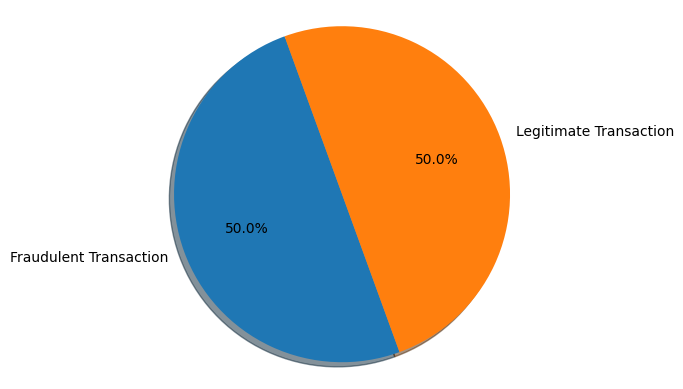

In [ ]:
# Example

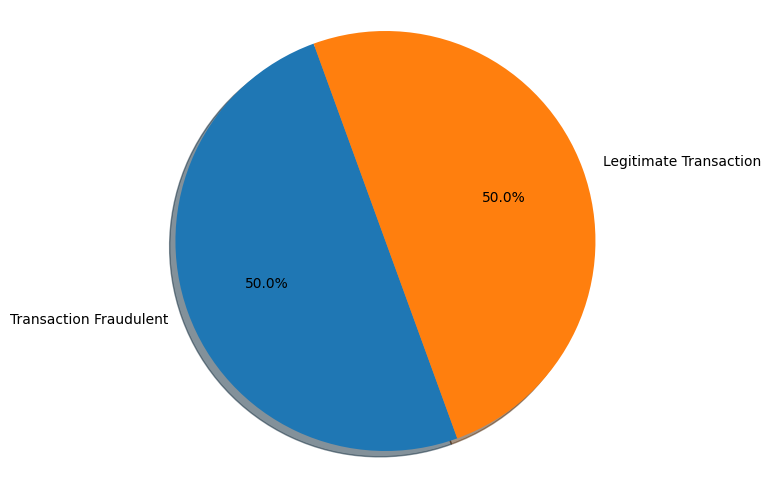

In [67]:
import matplotlib.pyplot as plt

def plot_data_imbalance(data_frame, target_column):
    """
    Display a pie chart to illustrate the class imbalance in the target column.

    :param data_frame: The DataFrame containing the data.
    :param target_column: The name of the target column for which the imbalance should be illustrated.
    """
    # Count occurrences of each class
    class_counts = data_frame[target_column].value_counts()

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=['Transaction Fraudulent','Legitimate Transaction'], autopct='%1.1f%%', startangle=110, shadow=True)
    #plt.title('Class Imbalance in {}'.format(target_column))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Chamar a função para exibir o desequilíbrio de classes na coluna 'TX_FRAUD_SCENARIO'
plot_data_imbalance(balanced_df, 'FRAUD')

In [68]:
balanced_df.shape

(3036372, 10)

In [ ]:
# It's up to you to continue
# Remember to look in the module subject for more information on what to do next and on the benefits of this module, the following exercises are no longer guided.

Logistic Regression accuracy: 0.802
K-Nearest Neighbors accuracy: 0.973
Decision Tree accuracy: 0.996
Random Forest accuracy: 1.000
Gradient Boosting accuracy: 0.983


In [69]:
from sklearn.model_selection import train_test_split
# Suponha que você tenha um DataFrame df com colunas categóricas
new_df01 = df.drop(columns=['TX_DATETIME',  'TX_FRAUDULENT_CATEGORY'])
# Crie variáveis dummy para as colunas categóricas
#new_df02 = pd.get_dummies(new_df01,dtype=int)

# Create a new binary target column
new_df01['is_fraudulent'] = new_df01['TX_FRAUD_SCENARIO'].isin(fraudulent_classes).astype(int)

# Separating features and new binary target variable
X = new_df01.drop(columns=['TX_FRAUD_SCENARIO', 'is_fraudulent'])
y = new_df01['is_fraudulent']

# Dividir os dados em conjuntos de treinamento e teste
# Definindo o tamanho do conjunto de teste para 30% dos dados e fixando random_state para garantir reprodutibilidade
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# shape do conjunto de treinamento e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1227908, 10)
(526247, 10)
(1227908,)
(526247,)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print("LogisticRegression - Accuracy:", accuracy)

LogisticRegression - Accuracy: 0.8935860917021855


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Suponha que você tenha seus dados carregados em X e y
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print("DecisionTreeClassifier - Accuracy:", accuracy)

DecisionTreeClassifier - Accuracy: 1.0


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Suponha que você tenha seus dados carregados em X e y
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo KNN (K-Nearest Neighbors)
# Escolha um valor para o parâmetro K (número de vizinhos)
k = 5  # Exemplo: utilizar 5 vizinhos
model = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print("KNeighborsClassifier - Accuracy:", accuracy)

KNeighborsClassifier - Accuracy: 0.885677149396718


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Suponha que você tenha seus dados carregados em X e y
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo Random Forest
# Escolha os hiperparâmetros adequados, como número de estimadores (n_estimators) e profundidade máxima (max_depth)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print("Accuracy:", accuracy)

Accuracy: 1.0


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Suponha que você tenha seus dados carregados em X e y
# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo Gradient Boosting
# Escolha os hiperparâmetros adequados, como número de estimadores (n_estimators) e profundidade máxima (max_depth)
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print("GradientBoostingClassifier - Accuracy:", accuracy)

GradientBoostingClassifier - Accuracy: 1.0
